#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 213010008, 213010012
4. Write your names here: Shipali , Vedanth S Saoor
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#PART 1

## Import Statements

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Normalize function 


In [2]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    row=0 
    col=0
    mean=0
    if(X.shape[0] == X.size):
        X=(X-X.mean())/X.std()
        return X
    else:
      # Column wise normalization
        row,col=X.shape
        Y=np.zeros((row,col),dtype=np.float64)
        for i in range(col):
            mean=X[:,[i]].mean()   #Finding the mean of the particular column
            std=X[:,[i]].std()     #Finding the standard deviation of the particular column
            for j in range(row):
                Y[j][i] = (X[j][i] - mean)/std
        return Y

In [3]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output.

In [4]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    ones = np.ones([len(X),1],dtype=int)
    X=np.append(X,ones,axis=1)    #Appending ones to the X matrix 
    Y=np.dot(X,w)                 #Finding the dot product between X and w
    return Y

    raise NotImplementedError()


In [5]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization
4. L1 loss is for MSE and L1 regularization

In [6]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    pred=Prediction(X,w).reshape(len(X),1) #Predicting the values for given X and w and reshaping them
    target=t.reshape(len(X),1)
    #Both the arrays are reshaped to make sure they have the same dimensions
    
    return((1/len(X))*np.sum((pred-target)**2))   #Returning MSE loss 
    raise NotImplementedError()

In [7]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [8]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number

    return((1/len(X))*np.sum(abs(Prediction(X,w) - t))) #Finding the Mean absolute error
    raise NotImplementedError()

In [9]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [10]:
def L2_Loss (X, t, w, lamda=0): # Output should be a single number
    ''' Need to specify what inputs are'''

    #The bias is not considered while calculating the loss
    L2 =  MSE_Loss(X,t,w) + lamda *np.sqrt(np.sum(w[:-1]**2))
    return L2
    raise NotImplementedError()

In [11]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [12]:
def L1_Loss (X, t, w, lamda): # Output should be a single number

    #The bias is not considered for calculating L1_loss
    _w=w[:-1]
    L1= MSE_Loss(X,t,w) + ((lamda)*np.sum(abs(_w))) 
    return L1
    raise NotImplementedError()

In [13]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [14]:
def NRMSE_Metric (X, t, w,lamda=0): # Output should be a single number

    #The NRMSE is found using the following formula
    return (MSE_Loss(X,t,w))**(1/2)/np.std(t)
    raise NotImplementedError()

In [15]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization
4. L1 gradient is for MSE and L1 regularization

In [16]:
def MSE_Gradient (X, t, w, lamda=0):
  
    pred = Prediction(X,w).reshape(len(X),1)
    target = t.reshape(len(X),1)

    #The bias is not considered while estimating the gradient
    grad = 2*(1/len(X))*np.dot(np.transpose(X),(pred-target))
    bias_grad=2*(1/len(X))*np.sum((Prediction(X,w)-t))
    grad = np.append(grad,bias_grad)
    return grad
    raise NotImplementedError()

In [17]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [18]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w

    #The bias term is not considered while estimating the MAE_gradient
    grad = (1/len(X))*np.dot(np.transpose(X),(Prediction(X,w)-t)/abs(Prediction(X,w)-t))
    bias_grad=(1/len(X))*np.sum((Prediction(X,w)-t)/abs(Prediction(X,w)-t))
    grad = np.append(grad,bias_grad)
    return grad
    raise NotImplementedError()

In [19]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [20]:
def L2_Gradient (X, t, w, lamda=0): # Output should have the same size as w

    #The bias term is not considered while estimating the L2_gradient
    w1=w[:-1]
    var = MSE_Gradient (X,t,w,lamda)[:-1] + lamda*((np.sum(w1**2))**(-1/2))*w1
    bias_grad = MSE_Gradient(X,t,w,lamda)[-1]
    var = np.append(var,bias_grad)
    return var
    raise NotImplementedError()

In [21]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [22]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    mod_w=np.zeros(len(w))
    
    #The for loop is used for the derivative of absolute function
    for i in range(len(w)):
        # if the value is lesser than zero then derivative is -1 else 1
        if(w[i] < 0):
            mod_w[i] = -1
        else:
            mod_w[i] = 1
    var = MSE_Gradient(X,t,w,lamda) + np.append(lamda*mod_w[:-1],0)
    return var
    raise NotImplementedError()

In [23]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [24]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): 

    #If the loss between the two iterations is lesser than threshold we will breakout of the loop
    for i in range(max_iter):
     
        loss_1 = NRMSE_Metric(X,t,w)  #Storing the loss prior to the updation of w
        w= w - lr * gradfunc(X,t,w,lamda)
        loss_2 = NRMSE_Metric(X,t,w)  #Computing the loss after the updation of w 
        diff = abs (loss_1 - loss_2)  #Estimating the change in the loss

        #Checking if the difference in loss prior to updation and  after updation is less than threshold then we exit the for loop
        if(diff < epsilon):
            break
        
    
    w_final = w   #Final weights after the gradient descent

    #Estimating the training and validation loss after final updation
    train_loss_final = lossfunc(X,t,w,lamda)
    validation_loss_final = lossfunc(X_val,t_val,w,lamda)
    validation_NRMSE = NRMSE_Metric(X_val,t_val,w)
    
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE 
    raise NotImplementedError()

In [25]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

The weights are calculated using the following formula

w = (X' X + lambda I)^(-1) X' t.

Here, the column of 1's in assumed to be included in X

In [26]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    #Adding ones to X
    ones =  np.ones((len(X),1))
    _,col = X.shape

    #Including columns of 1 to X
    X = np.append(X,ones,axis=1)
    X_T = np.transpose(X)         #Finding the transpose of X
    I =  np.identity(col+1)       #Creating and indentity matrix with n=col+1
    w =np.dot(np.linalg.inv(np.dot(X_T,X)+lamda*I),np.dot(X_T,t))    #Calculating the weights 
    return w
    raise NotImplementedError()

In [27]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

##Part 2

The following are the objects for this part
1. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
2. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
3. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.

In [28]:
#Reading the training dataset
dataset = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv")

#Printing the first five rows of the dataset
dataset.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [30]:
#Splitting the data into 80:20 
#Since the data contains 6082 sample/data points 80% of it is 4866

Y_train = (dataset.iloc[:4866,[-1]].to_numpy()).reshape(4866,)
Y_test = (dataset.iloc[4866:,[-1]].to_numpy()).reshape(1216,)

#Normalizing the data
X_= dataset.iloc[:,:-1]
X_= Normalize(X_.to_numpy())

#Splitting the dataset into training and testing
X_train = X_[:4866,:]
X_test = X_[4866:,:]

##Finding the best lamda for **MSE+lamda*L2(w)** loss function

RMSE Train:  2.739488394372402 NRMSE Train:  0.9788969585198156 RMSE Valid:  4.049072967511599 NRMSE Valid:  1.0594328161211988
RMSE Train:  2.541611657366635 NRMSE Train:  0.9081899840297315 RMSE Valid:  3.7460452152739054 NRMSE Valid:  0.9801461380366215
RMSE Train:  2.110367418311336 NRMSE Train:  0.7540941773610069 RMSE Valid:  2.9890721041986508 NRMSE Valid:  0.7820854556954642
RMSE Train:  1.7155251127158566 NRMSE Train:  0.6130058147176919 RMSE Valid:  2.1122483522917856 NRMSE Valid:  0.5526660641018538
RMSE Train:  1.5082316685636823 NRMSE Train:  0.5389339834887269 RMSE Valid:  1.593074501771933 NRMSE Valid:  0.4168251397900451
RMSE Train:  1.4095047026452212 NRMSE Train:  0.5036560363873627 RMSE Valid:  1.4910472619196697 NRMSE Valid:  0.39012989203703047
RMSE Train:  1.4017828765637876 NRMSE Train:  0.5008968087589988 RMSE Valid:  1.5086536058911493 NRMSE Valid:  0.39473656095235166


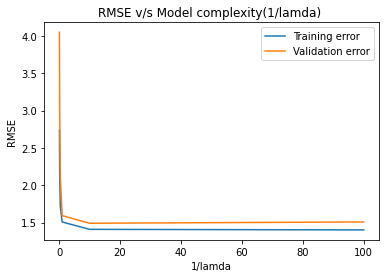

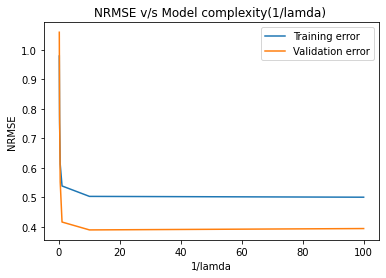

In [31]:
#Initializing a list that will store weights of different lamda
weights = []

#Taking some values of lamda
L = np.array([10,7.5,5,2.5,1,0.1,0.01])
max_iter = 1000
lr = 1e-2

#initializing np array's to store the respective error values
rmse_train = np.zeros(len(L))
rmse_valid = np.zeros(len(L))
nrmse_train = np.zeros(len(L))
nrmse_valid = np.zeros(len(L))

count=0

for lamda in L:
  #Generating random values for w in the range 0-1
  w =np.random.rand(22)
  grad = Gradient_Descent (X_train, X_test,Y_train,Y_test, w, lamda, max_iter, 1e-10, lr,L2_Loss ,L2_Gradient)
  weights.append(grad[0])

  #Estimating the errors 
  rmse_train[count] = (np.sqrt(MSE_Loss (X_train,Y_train,grad[0],lamda)))
  rmse_valid[count] =(np.sqrt(MSE_Loss (X_test,Y_test,grad[0],lamda)))
  nrmse_train[count] =NRMSE_Metric(X_train,Y_train,grad[0],lamda)
  nrmse_valid[count] =NRMSE_Metric(X_test,Y_test,grad[0],lamda)
  
  print("RMSE Train: ", rmse_train[count],'NRMSE Train: ',nrmse_train[count],"RMSE Valid: ",rmse_valid[count],'NRMSE Valid: ',nrmse_valid[count])
  
  count= count+1

#Plotting the RMSE and NRMSE 
lamda_inv = 1/L
plt.figure()
plt.title('RMSE v/s Model complexity(1/lamda) ')
plt.plot(lamda_inv,rmse_train,label='Training error')
plt.plot(lamda_inv,rmse_valid,label='Validation error')
plt.xlabel('1/lamda')
plt.ylabel('RMSE')
plt.legend()

plt.figure()
plt.title('NRMSE v/s Model complexity(1/lamda) ')
plt.plot(lamda_inv,nrmse_train,label='Training error')
plt.plot(lamda_inv,nrmse_valid,label='Validation error')
plt.xlabel('1/lamda')
plt.ylabel('NRMSE')
plt.legend()

##Finding the best lamda for **MSE+lamda*L1(w)** loss function

RMSE Train:  2.691057417338312 NRMSE Train:  0.9615911958036079 RMSE Valid:  3.983631244606216 NRMSE Valid:  1.042310104491707
RMSE Train:  2.6974820867935034 NRMSE Train:  0.9638869125520714 RMSE Valid:  4.002629841438717 NRMSE Valid:  1.047281053917935
RMSE Train:  2.6900663643782825 NRMSE Train:  0.9612370644518204 RMSE Valid:  3.9633596746301576 NRMSE Valid:  1.0370060838827297
RMSE Train:  2.191422217562311 NRMSE Train:  0.7830573577209627 RMSE Valid:  3.102680523910407 NRMSE Valid:  0.8118108987773837
RMSE Train:  1.6869234622976734 NRMSE Train:  0.6027856332193794 RMSE Valid:  2.0692077081123252 NRMSE Valid:  0.5414045552980894
RMSE Train:  1.4349464751792662 NRMSE Train:  0.5127471038304993 RMSE Valid:  1.5028971546808 NRMSE Valid:  0.3932303956237499
RMSE Train:  1.4044618979185055 NRMSE Train:  0.5018540991280073 RMSE Valid:  1.501529577077332 NRMSE Valid:  0.39287257135055664


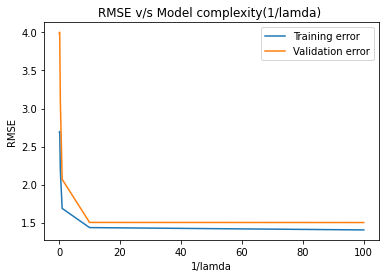

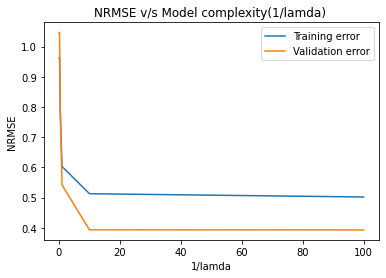

In [32]:
#Initializing a list that will store weights of different lamda
weights = []

#Taking some values of lamda
L = np.array([10,7.5,5,2.5,1,0.1,0.01])
max_iter = 1000
lr = 1e-2

#initializing np array's to store the respective error values
rmse_train = np.zeros(len(L))
rmse_valid = np.zeros(len(L))
nrmse_train = np.zeros(len(L))
nrmse_valid = np.zeros(len(L))

count=0

for lamda in L:
  #Generating random values for w in the range 0-1
  w =np.random.rand(22)
  grad = Gradient_Descent (X_train, X_test,Y_train,Y_test, w, lamda, max_iter, 1e-10, lr,L1_Loss ,L1_Gradient)
  weights.append(grad[0])

  #Estimating the errors 
  rmse_train[count] = (np.sqrt(MSE_Loss (X_train,Y_train,grad[0],lamda)))
  rmse_valid[count] =(np.sqrt(MSE_Loss (X_test,Y_test,grad[0],lamda)))
  nrmse_train[count] =NRMSE_Metric(X_train,Y_train,grad[0],lamda)
  nrmse_valid[count] =NRMSE_Metric(X_test,Y_test,grad[0],lamda)
  
  print("RMSE Train: ", rmse_train[count],'NRMSE Train: ',nrmse_train[count],"RMSE Valid: ",rmse_valid[count],'NRMSE Valid: ',nrmse_valid[count])
  
  count= count+1

#Plotting the RMSE and NRMSE
lamda_inv = 1/L
plt.figure()
plt.title('RMSE v/s Model complexity(1/lamda) ')
plt.plot(lamda_inv,rmse_train,label='Training error')
plt.plot(lamda_inv,rmse_valid,label='Validation error')
plt.xlabel('1/lamda')
plt.ylabel('RMSE')
plt.legend()

plt.figure()
plt.title('NRMSE v/s Model complexity(1/lamda) ')
plt.plot(lamda_inv,nrmse_train,label='Training error')
plt.plot(lamda_inv,nrmse_valid,label='Validation error')
plt.xlabel('1/lamda')
plt.ylabel('NRMSE')
plt.legend()

##Finding the best lamda for the **pseudo-inv method**

No handles with labels found to put in legend.


Lamda:  100.0  RMSE Train:  1.536  RMSE Validation:  1.902
Lamda:  10.0  RMSE Train:  1.401  RMSE Validation:  1.535
Lamda:  1.0  RMSE Train:  1.399  RMSE Validation:  1.513
Lamda:  0.1  RMSE Train:  1.399  RMSE Validation:  1.511
Lamda:  0.01  RMSE Train:  1.399  RMSE Validation:  1.511


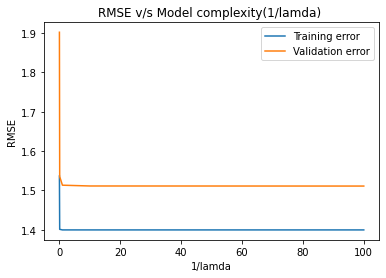

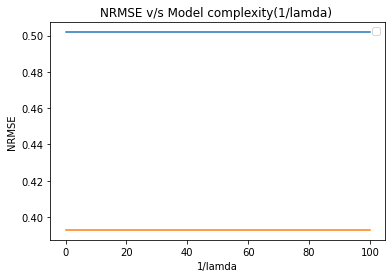

In [33]:
#Initializing a list that will store weights of different lamda
weights = []

#Taking some values of lamda
L = np.array([100,10,1,0.1,0.01])
count=0

rmse_train = np.zeros(len(L))
rmse_valid = np.zeros(len(L))
nrmse_train = np.zeros(len(L))
nrmse_valid = np.zeros(len(L))

for lamda in L:
    #Using the pseudo inverse method to find weights
    w = Pseudo_Inverse (X_train,Y_train, lamda)

    weights.append(w)

    rmse_train[count] = np.sqrt(MSE_Loss(X_train,Y_train,w,lamda))
    rmse_valid[count] = np.sqrt(MSE_Loss(X_test,Y_test,w,lamda))
    nrmse_train[count] =NRMSE_Metric(X_train,Y_train,grad[0],lamda)
    nrmse_valid[count] =NRMSE_Metric(X_test,Y_test,grad[0],lamda)

    print("Lamda: ",lamda," RMSE Train: ",round(rmse_train[count],3)," RMSE Validation: ",round(rmse_valid[count],3))
    count = count + 1

#Plotting the RMSE and NRMSE
lamda_inv = 1/L
plt.figure()
plt.title('RMSE v/s Model complexity(1/lamda) ')
plt.plot(lamda_inv,rmse_train,label='Training error')
plt.plot(lamda_inv,rmse_valid,label='Validation error')
plt.xlabel('1/lamda')
plt.ylabel('RMSE')
plt.legend()


plt.figure()
plt.title('NRMSE v/s Model complexity(1/lamda) ')
plt.plot(lamda_inv,nrmse_train)
plt.plot(lamda_inv,nrmse_valid)
plt.xlabel('1/lamda')
plt.ylabel('NRMSE')
plt.legend()

In [34]:
#Reading the testing dataset
dataset2 = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv")

#Printing the first five rows of the dataset
dataset2.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,27.9,19.9,58.964123,97.821373,26.798375,20.828714,6.397833,75.366664,0.197580,0.306510,0.423613,0.842868,0.0,0.0,0.0,0.025890,37.6046,126.991,212.3350,2.7850,5992.895996
1,30.3,21.0,51.617828,89.577393,29.069652,22.979956,6.199736,54.449329,0.193229,0.311707,0.431707,0.816846,0.0,0.0,0.0,0.031924,37.6046,127.032,44.7624,0.5141,5869.312500
2,30.2,22.5,47.538521,85.529457,29.696974,23.554281,6.269956,14.450297,0.200518,0.301901,0.410575,0.825653,0.0,0.0,0.0,0.011254,37.5776,127.058,33.3068,0.2661,5863.555664
3,30.7,22.0,59.407711,98.806969,28.234872,21.380987,6.755825,105.226457,0.186295,0.302106,0.397818,0.781959,0.0,0.0,0.0,0.041682,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,0.447998,0.823050,0.0,0.0,0.0,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246


In [35]:
#Converting to numpy and normatizing the data
test_X = dataset2.to_numpy()
test_X = Normalize(test_X)

#We have considered weights that are obtained from pseudo inverse method and lamda of 0.01
weight = weights[3]

#Predicting the Next day temperature using the test set data and the weights from pseudo inv method
test_Y = Prediction(test_X,weight)

pred_Y = pd.DataFrame(test_Y,columns=['Next_Tmax'])

#pred_Y.to_csv("213010008_213010012_1.csv")

R2:  0.846


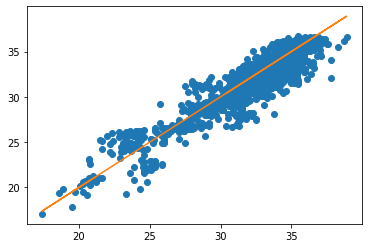

In [36]:
#Prediction using the validation data set and the weights that are found using the pseudo inverse method
#X_test is the validation data from training set and test_X is the data form the test set 

valid_Y = Prediction(X_test,weight)

#Estimating the R2 values for our model
R2 = 1- np.sum(np.square(Y_test-valid_Y))/np.sum(np.square(Y_test-np.mean(valid_Y)))

print("R2: ",round(R2,3))
plt.plot(Y_test,valid_Y,'o')
plt.plot(Y_test,Y_test)

##Discussion

1. No null/nan value was present in the data
2. While training the L2 and L1 model with learning rate of $10^{-5}$ it was observed that the error was increasing therefore we changed the learning rate $10^{-2}$ and it was observed that the error was decreasing
3. For L1 and L2 to we can observed that error for values greater than $lamda = 0.01$ almost is same, and $lamda=0.01$ is the elbow point.
4. The pseudo inverse method is faster as expected and gives lesser error compared to L1 and L2 method. Hence the pseudo inverse method is used to predict the values on the test set.
5. The $R^2$ value for the model that is used is 0.846. The ${R^2}$ gives the information about the goodness of fit of the model. It can be intepreted as the percentage of variance in the dependent variable that the independent variable explains.


##References 
[1]Training data: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv

[2]Testing data: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv

[3] https://statisticsbyjim.com/regression/interpret-r-squared-regression/#:~:text=R%2Dsquared%20evaluates%20the%20scatter,multiple%20determination%20for%20multiple%20regression.&text=R%2Dsquared%20is%20the%20percentage,that%20a%20linear%20model%20explains


[4] https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=R2%3D1%E2%88%92sum%20squared,i%E2%88%92%C2%AFy)2.&text=The%20sum%20squared%20regression%20is,from%20the%20mean%20all%20squared